In [1]:
import numpy as np
import tifffile
import matplotlib.pyplot as plt
from deep_iglu_denoiser.utils.normalization import rolling_window_z_norm

In [10]:
import h5py
peak_db = h5py.File('/home/stephan/Desktop/iglusnfr3_database/traces.h5','r')

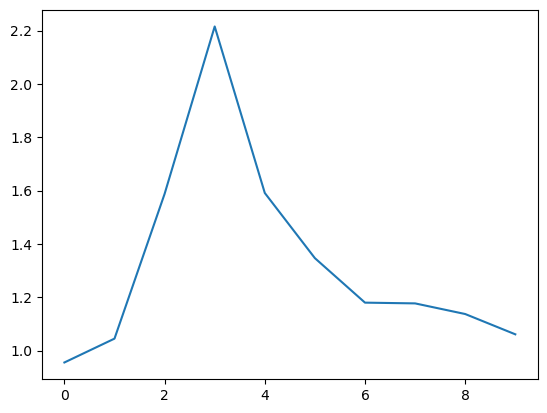

In [115]:
peak_db.keys()

<KeysViewHDF5 ['1', '10', '2', '3', '4', '5', '6', '7', '8', '9', 'peak_frame']>

In [111]:
peak_db.close()

In [144]:
def generate_synapse(height: int, width: int, synapse_diameter: int, peak: np.ndarray) -> np.ndarray:
    canvas = np.zeros((len(peak),height,width),dtype=np.float64)
    # circular synapse
    random_pos_y = np.random.choice(height)
    random_pos_x = np.random.choice(width)
    # initialize normal distribution
    norm_dist = norm.pdf(np.arange(0, synapse_diameter+1, 0.01),0,8)
    norm_dist = [n/np.max(norm_dist) for n in norm_dist]
    print(len(norm_dist))
    for y in range(height):
        for x in range(width):
            distance = np.sqrt(pow(y-random_pos_y,2)+pow(x-random_pos_x,2))
            if distance > synapse_diameter:
                continue
            for frame in range(len(peak)):
                canvas[frame,y,x] = peak[frame]*norm_dist[int(distance*100)]
    return canvas

    

x = generate_synapse(20,20,7,np.array(peak_db.get("1")["0"]))


800


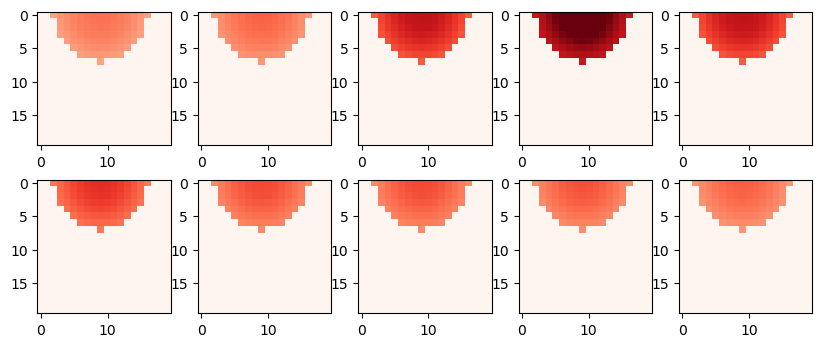

In [145]:
fig,ax = plt.subplots(2,5)
fig.set_size_inches(10,4)
for frame in range(x.shape[0]):
    col = 0 if frame < 5 else 1
    row = frame % 5
    ax[col,row].imshow(x[frame],cmap='Reds',vmin=0,vmax=2)

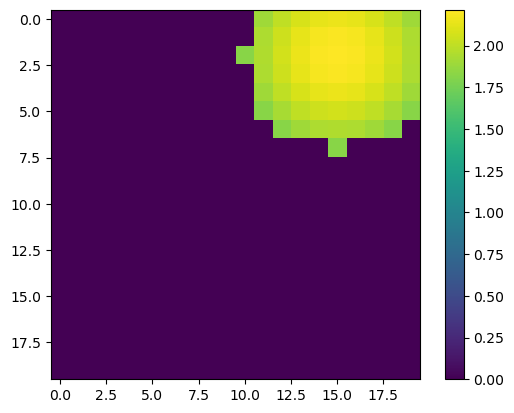

In [141]:
plt.imshow(x[3])
plt.colorbar()

In [123]:
len(np.array(peak_db.get("1")["0"]))

10

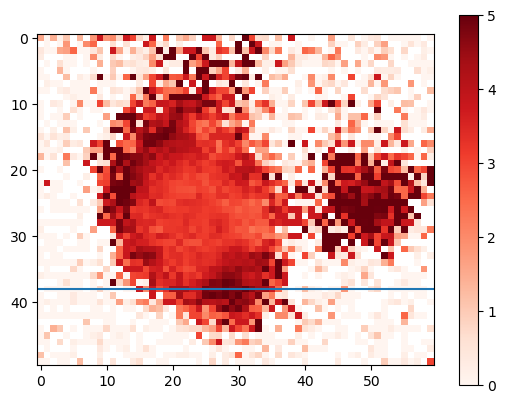

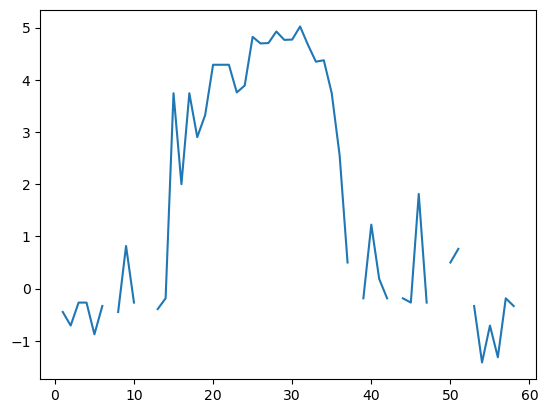

In [82]:
plt.imshow(synapse_norm[102],cmap='Reds',vmin=0,vmax=5)
plt.axhline(38)
plt.colorbar()
plt.show()
plt.plot(synapse_norm[102][38])

In [83]:
synapse_norm[102][38]

array([        nan, -0.4472136 , -0.70710678, -0.26726124, -0.26726124,
       -0.87447463, -0.33333333,         nan, -0.4472136 ,  0.81649658,
       -0.26726124,         nan,         nan, -0.39223227, -0.18569534,
        3.74165739,  2.        ,  3.74165739,  2.90128863,  3.32347026,
        4.28660705,  4.28660705,  4.28660705,  3.75692744,  3.8890873 ,
        4.8207073 ,  4.69504827,  4.70234337,  4.92346166,  4.76329974,
        4.76867291,  5.01973292,  4.66666667,  4.34599131,  4.37286533,
        3.74165739,  2.54950976,  0.5       ,         nan, -0.18569534,
        1.22474487,  0.18569534, -0.18569534,         nan, -0.18569534,
       -0.26726124,  1.81265393, -0.26726124,         nan,         nan,
        0.5       ,  0.76088591,         nan, -0.33333333, -1.41421356,
       -0.70710678, -1.31425748, -0.18569534, -0.33333333,         nan])

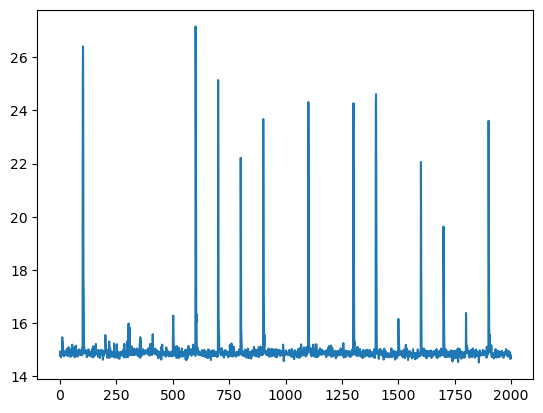

In [41]:
plt.plot(synapse.mean(axis=(1,2)))

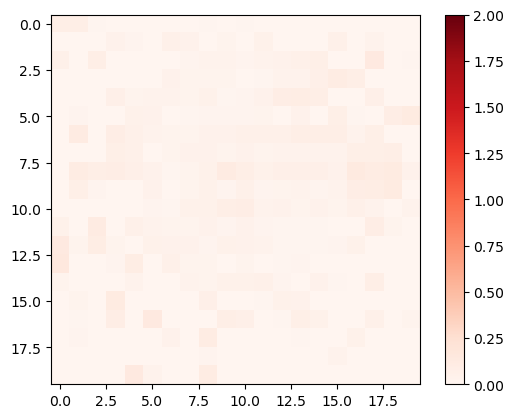

In [39]:
plt.imshow(synapse_norm[303],cmap='Reds',vmin=0,vmax=2)
plt.colorbar()

In [14]:
background = np.min(synapse,axis=0)

In [21]:
background

array([[ 7.,  8.,  7.,  9.,  8., 10., 13., 13., 13., 13., 12., 10.,  9.,
         8.,  7.,  6.,  7.,  7.,  7.,  6.],
       [ 6.,  8.,  8.,  9., 10., 13., 14., 18., 20., 21., 19., 16., 13.,
         9.,  9.,  8.,  7.,  7.,  6.,  7.],
       [ 7.,  9.,  8., 10.,  9., 13., 18., 22., 23., 24., 22., 19., 16.,
        12., 10.,  8.,  7.,  6.,  7.,  7.],
       [ 7.,  8.,  8., 11., 12., 17., 20., 24., 27., 26., 25., 24., 20.,
        14., 12.,  9.,  8.,  8.,  7.,  7.],
       [ 7.,  7.,  8., 10., 14., 18., 22., 27., 27., 27., 26., 23., 19.,
        16., 13.,  9.,  7.,  7.,  6.,  7.],
       [ 7.,  8.,  9., 12., 14., 18., 25., 34., 36., 36., 33., 27., 23.,
        16., 17., 12.,  7.,  8.,  6.,  7.],
       [ 7.,  7.,  8.,  9., 13., 19., 26., 29., 37., 39., 36., 23., 23.,
        19., 17., 13.,  9.,  7.,  6.,  7.],
       [ 7.,  8.,  9., 11., 14., 19., 24., 29., 32., 36., 34., 29., 25.,
        23., 20., 18., 11.,  8.,  7.,  8.],
       [ 7.,  7.,  8.,  9., 13., 18., 24., 27., 31., 29., 32., 2

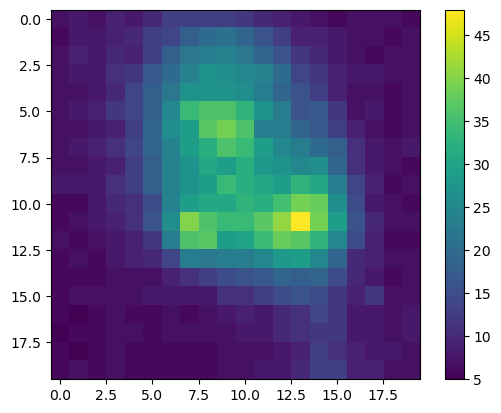

In [42]:
plt.imshow(background)
plt.colorbar()

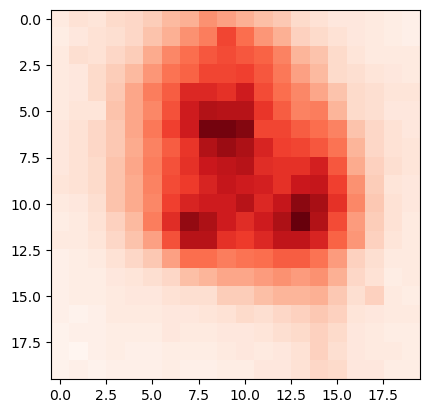

In [5]:
plt.imshow(synapse[103],cmap='Reds')

In [1]:
import numpy as np

In [3]:
t = np.random.random((100,50,50))

0
0
1


In [21]:
import h5py
f = h5py.File('/mnt/nvme2/iGlu_train_data/iglu_train_data_cropsize32_roisize4_z2.h5')

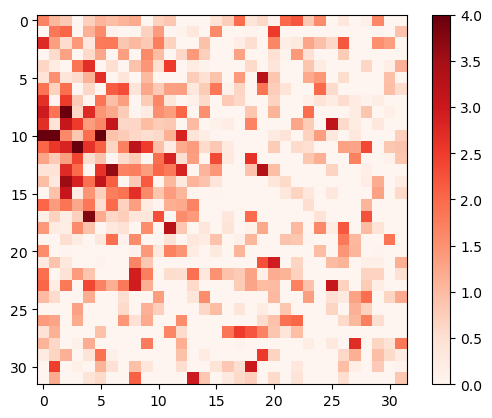

In [55]:
plt.imshow(f.get("1613"),cmap='Reds',vmin=0,vmax=4)
plt.colorbar()

In [6]:
!pip install dask_image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 17.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 10.4 MB/s eta 0:00:00
  Created wheel for pims: filename=PIMS-0.6.1-py3-none-any.whl size=82619 sha256=c90f9b37a4f51376f01bf6a6f8e1001d64613d009fcca7f204a72e4d93053951
  Stored in directory: /home/stephan/.cache/pip/wheels/cc/bf/3e/bfa77232d942f8244145f9c713b6b38f6ef04b6fb5c021c114
Successfully built pims


In [15]:
x = dask.array.array([i for i in range(20)])

In [18]:
type(x)

dask.array.core.Array

In [22]:
import tifffile
import dask_image.imread
import dask.array as da
import numpy as np

filepath="/home/stephan/Desktop/glu_test_data/raw/Glu-1Hz-Stim_20s_1_R2.tif"

x = dask_image.imread.imread(filepath)


In [12]:
x = x.astype(np.float64)

In [31]:
da.append(da.array([]),1)

dask.array<astype, shape=(1,), dtype=float64, chunksize=(1,), chunktype=numpy.ndarray>

In [57]:
from dask_image.ndfilters import uniform_filter
import dask
from tqdm import tqdm

def transform_frame(
    list_param: list
) -> list[float]:
    frame, cropsize, h_activitymap, w_activitymap,roi_size = list_param
    activity_map_frame = []
    mean_frame = uniform_filter(frame, roi_size, mode="constant")
    for y in range(h_activitymap):
        start_y = y * cropsize
        stop_y = (y + 1) * cropsize
        row = []
        for x in range(w_activitymap):
            start_x = x * cropsize
            stop_x = (x + 1) * cropsize

            row.append(da.max(mean_frame[start_y:stop_y, start_x:stop_x]))
        activity_map_frame.append(row)
    return activity_map_frame


def compute_activitymap(img: np.ndarray, cropsize: int, roi_size: int):
    """
    Compute the activity map for a sequence of image frames by applying the
    transform_frame function.

    Parameters:
    - img (np.ndarray): Input image sequence as a 3D NumPy array.
    - cropsize: Size of the kernel used for patch extraction (image size on that is trained).
    - roi_size: Size of the sliding window (Region of Interest).

    Returns:
    - np.ndarray: Activity map for the input image sequence.
    """
    h_activitymap = img.shape[1] // cropsize
    w_activitymap = img.shape[2] // cropsize
    activitymap = []
    blocks = img.to_delayed().ravel()
    results = [da.from_delayed(transform_frame([frame,cropsize,h_activitymap,w_activitymap,roi_size]),shape=(2000,), dtype=np.float64) for frame in blocks]
    activitymap = da.concatenate(results, axis=1, allow_unknown_chunksizes=True)
    arr.compute()
    print('activitymap')
    return activitymap


def get_frames_position(
    img: np.ndarray,
    min_z_score: float,
    cropsize: int = 32,
    roi_size: int = 4,
) -> list[list[int]]:
    """
    Identify positions of frames based on the computed activity map and a minimum Z-score threshold.

    Parameters:
    - img (np.ndarray): Input image sequence as a 3D NumPy array.
    - min_z_score (float): Minimum Z-score threshold for identifying frames.
    - cropsize (int): Size of the kernel used for patch extraction.
    - roi_size (int): Size of the sliding window (Region of Interest).
    - foreground_background_split (float): Split ratio between foreground and background.

    Returns:
    - list[list[int]]: List of frame positions, each represented as [frame_index, y_position, x_position].
    """
    frames_w_pos = []
    activitymap = compute_activitymap(img, cropsize, roi_size)
    above_z = da.argwhere(activitymap > min_z_score)
    for example in above_z:
        frame, y, x = example
        frames_w_pos.append([int(frame), int(y * cropsize), int(x * cropsize)])
    print('Frmaes')
    return frames_w_pos


In [58]:
import time
start = time.time()
mean = x.mean(axis=0)
std = x.std(axis=0)
normalized_file = da.divide(da.subtract(x,mean),std)
print('HERE')
# will go through all frames and extract events that within a meaned kernel exceed the
# min_z_score threshold
# returns a list of events in the form [frame, y-coord, x-coord]
frames_and_positions = get_frames_position(
    normalized_file,
    3,
    32,
    6
)

print(f'Execution took {np.round(time.time()-start,3)}s.')

HERE


TypeError: The ndim must be of integral type.

In [5]:
import roifile

In [38]:
roi

ImagejRoi(
    roitype=ROI_TYPE.OVAL,
    name='0121-0501-0360',
    version=228,
    top=495,
    left=354,
    bottom=507,
    right=366,
    position=121,
)

In [39]:
roi.top

495

In [32]:
from shapely.geometry import Polygon,Point
import cv2
poly = Polygon(roi.coordinates())
#roi.coordinates()

In [31]:
for x,y in zip(np.arange(1000),np.arange(1000)):
    if poly.within(Point([x,y])):
        print(x,y)

In [30]:
poly.within(Point([368 , 490]))

False

In [41]:
roi = roifile.roiread('0121-0501-0360.roi')
img = np.zeros([1000,1000])
# roi to circular mask
center_x = (roi.right-roi.left)//2 + roi.left
center_y = (roi.bottom-roi.top)//2 + roi.top
radius = (roi.bottom-roi.top)//2
mask = disk((center_y,center_x),radius)
img[mask] = True

In [45]:
img.mean()

0.000109

In [79]:
def extract_roi_trace(img: np.ndarray, roi_path: str) -> np.ndarray:
    roi = roifile.roiread("0121-0501-0360.roi")
    # roi to circular mask
    center_x = (roi.right - roi.left) // 2 + roi.left
    center_y = (roi.bottom - roi.top) // 2 + roi.top
    radius = (roi.bottom - roi.top) // 2
    mask = disk((center_y, center_x), radius)
    #tmp = np.mean(img,axis=2)
    return np.mean(img[:,mask[0],mask[1]],axis=1)

In [54]:
from deep_iglu_denoiser.utils.open_file import open_file
img = open_file("/home/stephan/Desktop/glu_test_data/raw/Glu-1Hz-Stim_20s_3_R2.tif")

In [55]:
img.shape

(2000, 806, 804)

In [76]:
mask

(array([496, 496, 496, 496, 496, 496, 496, 497, 497, 497, 497, 497, 497,
        497, 497, 497, 498, 498, 498, 498, 498, 498, 498, 498, 498, 498,
        498, 499, 499, 499, 499, 499, 499, 499, 499, 499, 499, 499, 500,
        500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 501, 501, 501,
        501, 501, 501, 501, 501, 501, 501, 501, 502, 502, 502, 502, 502,
        502, 502, 502, 502, 502, 502, 503, 503, 503, 503, 503, 503, 503,
        503, 503, 503, 503, 504, 504, 504, 504, 504, 504, 504, 504, 504,
        504, 504, 505, 505, 505, 505, 505, 505, 505, 505, 505, 506, 506,
        506, 506, 506, 506, 506]),
 array([357, 358, 359, 360, 361, 362, 363, 356, 357, 358, 359, 360, 361,
        362, 363, 364, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364,
        365, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 355,
        356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 355, 356, 357,
        358, 359, 360, 361, 362, 363, 364, 365, 355, 356, 357, 358, 359,
        360, 361

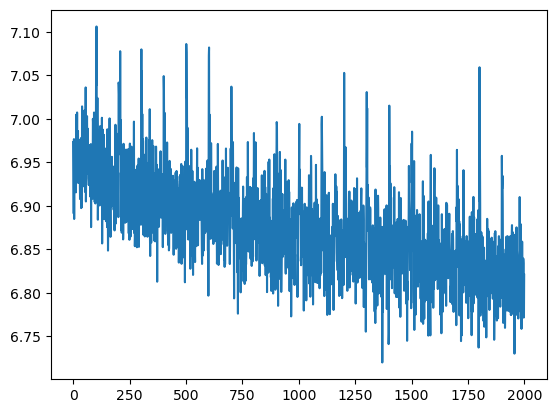

In [71]:
plt.plot(extract_roi_trace(img,''))

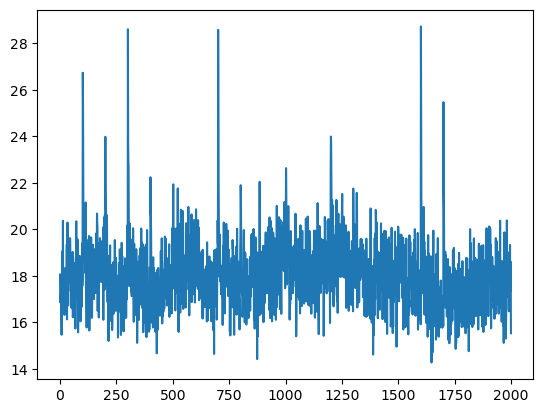

In [80]:
plt.plot(extract_roi_trace(img,''))

In [2]:
import json
import matplotlib.pyplot as plt
import os
import numpy as np
from scipy.stats import pearsonr
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [3]:
with open("/run/media/stephan/Elements/girdsearch_models/raw_performance.json","r") as f:
    raw = json.load(f)

In [4]:
lowest_std = np.inf
model_name = ""
result_dir = "/run/media/stephan/Elements/girdsearch_models"
performance_result = []
for file in os.listdir(result_dir):
    if file.startswith("raw"): continue
    if not file.endswith(".json"): continue
    with open(os.path.join(result_dir,file),"r") as f:
        tmp = json.load(f)
    # baseline std
    if tmp['noise_stds'] < lowest_std:
        lowest_std = tmp['noise_stds']
        model_name = file.split('.json')[0]
    # correlation
    vals_model = []
    vals_raw = []
    for roi in tmp.keys():
        if roi == 'noise_stds': continue
        vals_model += tmp[roi]["peak_intensities_match_raw_events"]
        vals_raw += raw[roi]['peak_intensities']
    perason_r_result = pearsonr(vals_model,vals_raw)
    mae = mean_absolute_error(vals_raw,vals_model)
    mape = mean_absolute_percentage_error(vals_raw,vals_model)
    result_line = [file.split('_performance.json')[0],tmp['noise_stds'],perason_r_result.statistic,perason_r_result.pvalue,mae,mape]
    performance_result.append(result_line)
    
performance_result = pd.DataFrame(performance_result,columns=['model','noise_std','R','pval','MAE','MAPE'])


In [5]:
performance_result.sort_values('MAPE',inplace=True)
performance_result['rank_mape'] = np.arange(1,performance_result.shape[0]+1)
performance_result.sort_values('noise_std',ascending=True,inplace=True)
performance_result['rank_noise'] = np.arange(1,performance_result.shape[0]+1)
performance_result['rank'] = (2*performance_result['rank_mape'] + performance_result['rank_noise'])/3
performance_result.sort_values('rank')

,model,noise_std,R,pval,MAE,MAPE,rank_mape,rank_noise,rank
124,unet_Smooth-L1-loss_noisescale-2.0_noisecenter...,0.414036,0.996797,7.269032e-171,4.404493,0.171746,39,70,49.333333
106,unet_Huber-loss_noisescale-2.0_noisecenter-0_g...,0.478101,0.997066,8.507931e-174,4.554223,0.178039,40,76,52.000000
74,unet_Huber-loss_noisescale-1.5_noisecenter-0_g...,0.561678,0.998173,1.309876e-189,3.763820,0.148835,35,91,53.666667
123,unet_Smooth-L1-loss_noisescale-2.0_noisecenter...,0.502685,0.995946,5.319204e-163,4.776817,0.183240,42,80,54.666667
119,unet_L1-loss_noisescale-2.0_noisecenter-0_gaus...,0.495834,0.996075,4.432457e-164,4.819572,0.188611,43,79,55.000000
...,...,...,...,...,...,...,...,...,...
49,unet_L1-loss_noisescale-1.0_noisecenter-1.0_ga...,0.668502,0.997679,1.280986e-181,11.909021,0.391290,155,110,140.000000
42,unet_Smooth-L1-loss_noisescale-0.5_noisecenter...,1.025430,0.998696,6.887364e-201,11.172018,0.371607,137,149,141.000000
50,unet_L1-loss_noisescale-1.0_noisecenter-1.0_ga...,0.684861,0.997133,1.441443e-174,11.905846,0.391501,156,113,141.666667
4,unet_L1-loss_noisescale-0.5_noisecenter-1.0_ga...,1.049264,0.989567,1.719559e-131,14.241884,0.464913,178,153,169.666667


In [6]:
performance_result.sort_values('rank').head(15)

,model,noise_std,R,pval,MAE,MAPE,rank_mape,rank_noise,rank
124,unet_Smooth-L1-loss_noisescale-2.0_noisecenter...,0.414036,0.996797,7.269032e-171,4.404493,0.171746,39,70,49.333333
106,unet_Huber-loss_noisescale-2.0_noisecenter-0_g...,0.478101,0.997066,8.507931e-174,4.554223,0.178039,40,76,52.000000
74,unet_Huber-loss_noisescale-1.5_noisecenter-0_g...,0.561678,0.998173,1.309876e-189,3.763820,0.148835,35,91,53.666667
123,unet_Smooth-L1-loss_noisescale-2.0_noisecenter...,0.502685,0.995946,5.319204e-163,4.776817,0.183240,42,80,54.666667
119,unet_L1-loss_noisescale-2.0_noisecenter-0_gaus...,0.495834,0.996075,4.432457e-164,4.819572,0.188611,43,79,55.000000
66,unet_MSE-loss_noisescale-2.0_noisecenter-0_gau...,0.510220,0.996941,2.095792e-172,4.581745,0.180721,41,83,55.000000
130,unet_Huber-loss_noisescale-2.0_noisecenter-0_g...,0.544204,0.997155,8.090963e-175,4.324394,0.164988,38,89,55.000000
149,unet_L1-loss_noisescale-3.0_noisecenter-0_gaus...,0.283258,0.994144,9.897013e-151,5.940485,0.227321,64,37,55.000000
179,unet_L1-loss_noisescale-2.0_noisecenter-0_gaus...,0.579765,0.997064,9.006276e-174,4.159962,0.161033,37,92,55.333333
155,unet_Smooth-L1-loss_noisescale-3.0_noisecenter...,0.323764,0.994084,2.163364e-150,5.485827,0.213708,61,45,55.666667


In [10]:
raw_roi_trace = pd.read_csv("/home/stephan/Desktop/glu_test_data/raw/01_0624-0329-0386.csv")
denoised_roi_trace = pd.read_csv("/run/media/stephan/Elements/girdsearch_models/unet_Smooth-L1-loss_noisescale-2.0_noisecenter-0_gaussian-True_sigma-1.0/1_0624-0329-0386.csv")

In [12]:
from scipy.stats import zscore
raw_roi_trace_z = zscore(raw_roi_trace['Mean'])
denoised_roi_trace_z = zscore(denoised_roi_trace['Mean'])

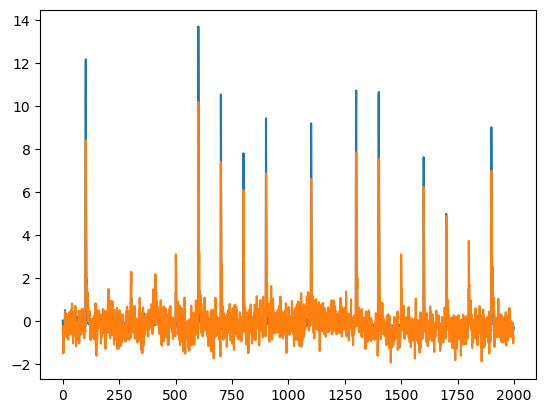

In [14]:
plt.plot(denoised_roi_trace_z)

plt.plot(raw_roi_trace_z)


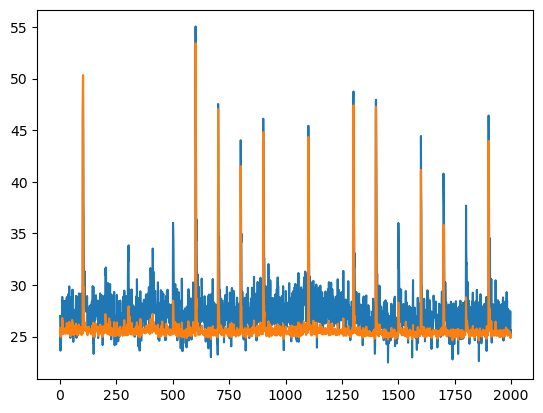

In [11]:
plt.plot(raw_roi_trace['Mean'])
plt.plot(denoised_roi_trace['Mean'])


In [9]:
raw_roi_trace

,[sec],Mean
0,0.0000,27.0000
1,0.0100,26.5179
2,0.0200,23.6339
3,0.0300,25.1071
4,0.0400,23.7857
...,...,...
1995,19.9657,25.7946
1996,19.9757,27.4643
1997,19.9857,24.8929
1998,19.9957,25.4911


In [7]:
performance_result.loc[124].model

'unet_Smooth-L1-loss_noisescale-2.0_noisecenter-0_gaussian-True_sigma-1.0'

In [54]:
performance_result.loc[37].model

'unet_L1-loss_noisescale-1.0_noisecenter-0.5_gaussian-True_sigma-0.5'

In [22]:
t= pearsonr(vals_model,vals_raw)

In [26]:
t

PearsonRResult(statistic=0.9994522317194298, pvalue=7.076506293413071e-230)

In [25]:
t.statistic

0.9994522317194298

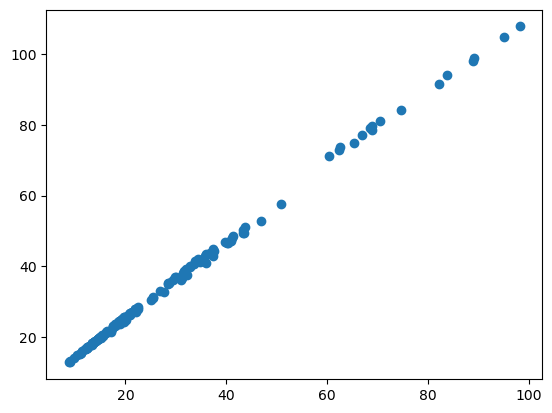

In [16]:
plt.scatter(vals_model,vals_raw)

In [14]:
tmp

{'0650-0658-0211': {'peak_frames': [303, 701, 802, 1300],
  'peak_intensities': [23.31192660550459,
   23.81651376146789,
   25.192660550458715,
   24.568807339449542]},
 '0509-0262-0342': {'peak_frames': [102,
   202,
   401,
   501,
   1001,
   1201,
   1601,
   1700,
   1800,
   1900],
  'peak_intensities': [21.770642201834864,
   21.522935779816514,
   19.422018348623855,
   20.513761467889907,
   18.321100917431192,
   20.06422018348624,
   18.926605504587155,
   19.3302752293578,
   22.486238532110093,
   23.68807339449541]},
 '0509-0604-0600': {'peak_frames': [203, 603, 801, 1901],
  'peak_intensities': [14.18348623853211,
   12.908256880733944,
   13.155963302752294,
   13.311926605504587]},
 '0650-0626-0223': {'peak_frames': [103,
   203,
   401,
   601,
   701,
   901,
   1001,
   1101,
   1401,
   1601],
  'peak_intensities': [26.990825688073393,
   24.10091743119266,
   32.972477064220186,
   25.24770642201835,
   26.94495412844037,
   26.68807339449541,
   25.1834862385321

In [10]:
tmp['0650-0658-0211'].keys()

dict_keys(['peak_frames', 'peak_intensities', 'peak_intensities_match_raw_events'])

In [11]:
tmp.keys()

dict_keys(['0650-0658-0211', '0509-0262-0342', '0509-0604-0600', '0650-0626-0223', '0316-0320-0412', '0650-0618-0234', '0121-0579-0308', '0634-0208-0609', '0121-0604-0268', '0509-0514-0518', '0624-0329-0386', '0624-0406-0400', '0509-0292-0232', '0509-0559-0565', '0509-0545-0540', '0121-0501-0360', '0650-0638-0202', '0509-0646-0649', '0554-0290-0231', '0650-0692-0181', '0121-0550-0335', '0624-0376-0394', '1666-0665-0566', '0509-0423-0419', 'noise_stds'])